In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [85]:
#define image1 here

image1 = [
  [141, 0 , 138, 143, 143, 143, 144],
  [141, 140, 140, 142, 142, 143, 143],
  [140, 145, 145, 144, 142, 142, 145],
  [141, 141, 141, 143, 142, 141, 143],
  [139, 140, 141, 141, 142, 143, 144]
]

image1 = np.array(image1, dtype=np.uint8)

In [86]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    # Initialize the histogram list with zeros. Assuming 256 bins for 8-bit images.
    hist = [0] * 256

    # Manually iterate through each row and pixel in the image
    for row in image:
        for pixel in row:
            hist[pixel] += 1

    return hist

Text(0.5, 1.0, 'histogram')

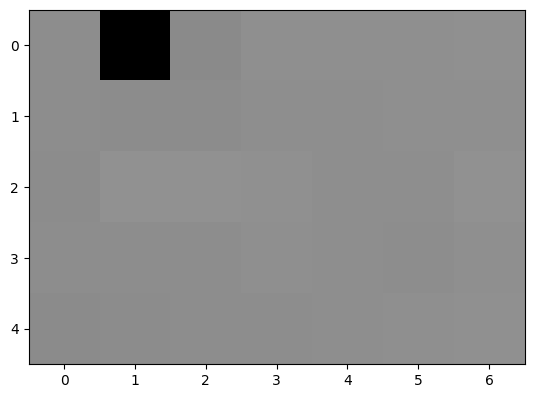

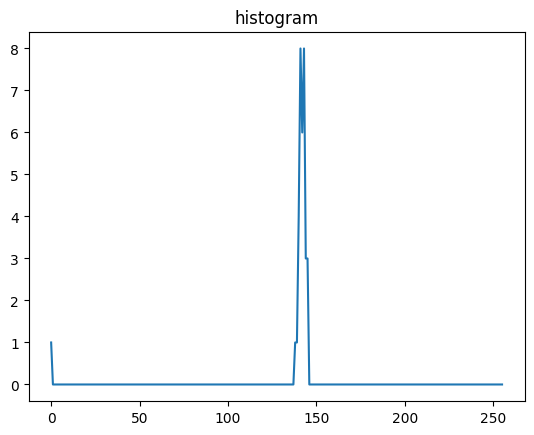

In [87]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [89]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
    '''
    Applies histogram stretching to a 2D NumPy array image.

    Parameters:
    - image (ndarray): Input grayscale image.

    Returns:
    - output_image (ndarray): Enhanced image with histogram stretching applied.
    '''
    output_image = image.copy()

    # Ensure image is a NumPy array
    if not isinstance(output_image, np.ndarray):
        image = np.array(output_image)

    # Calculate the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Avoid division by zero
    if max_val - min_val == 0:
        return image

    # Apply histogram stretching
    output_image = ((image - min_val) / (max_val - min_val)) * 255
    output_image = np.round(output_image).astype('uint8')  # Convert to uint8

    return output_image

Text(0.5, 1.0, 'stretched histogram')

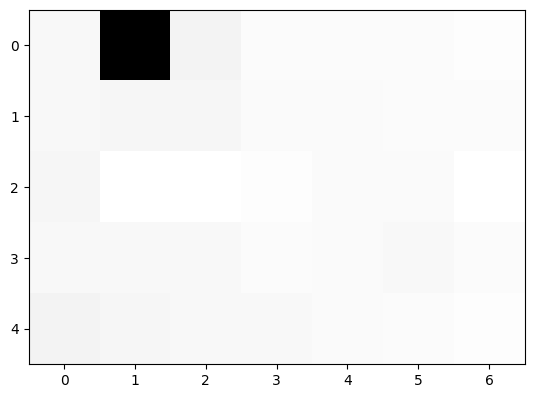

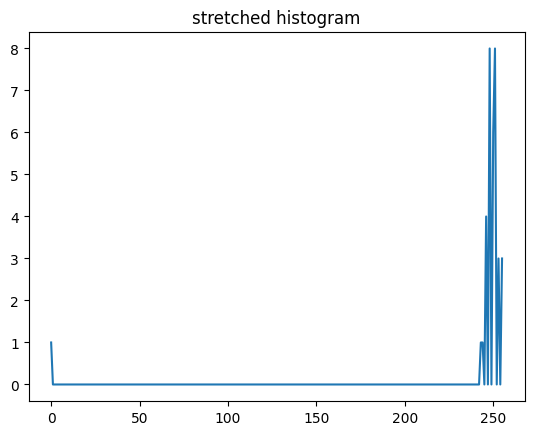

In [90]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [109]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()

  # Start
  if not isinstance(output_image, np.ndarray):
    image = np.array(output_image)

  # Calculate the scale factor for linear scaling
  scale_factor = 255.0 / (max_value - min_value)

  # Create a mask for pixels within the clipping range
  lower_mask = image >= min_value
  upper_mask = image <= max_value

  # Initialize the output image with the scaled values where the mask is True
  output_image = (image - min_value) * scale_factor * lower_mask * upper_mask

  # Set clipped values to 0 or 255 where the mask is False
  output_image[image < min_value] = 0
  output_image[image > max_value] = 255

  # Make sure to return the output image as an 8-bit unsigned integer array
  return output_image.astype(np.uint8)

  # End


Text(0.5, 1.0, 'clipped histogram')

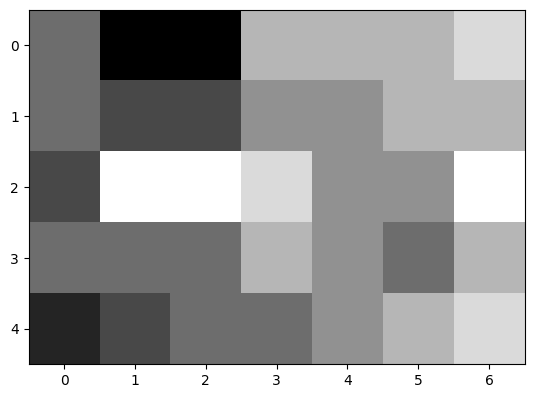

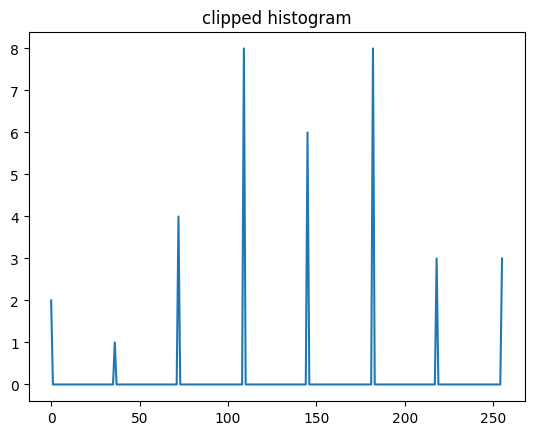

In [110]:
#dont change this cell
min_value = 138
max_value = 145
plt.imshow(clip_hist(image1, min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part3


In [111]:
# first read the image and show it.(image2)

image = cv2.imread('image2.png', cv2.IMREAD_COLOR)

Original Image‍‍‍‍‍



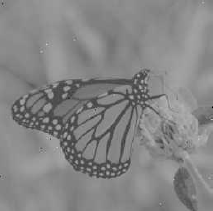



Stretched Image



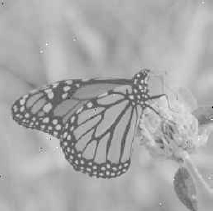

In [119]:
from google.colab.patches import cv2_imshow

stretched_image = np.array(stretch_hist(image))

# Display the original and stretched images
print("Original Image‍‍‍‍‍\n")
cv2_imshow(image)
print('\n')
print("Stretched Image\n")
cv2_imshow(stretched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Image



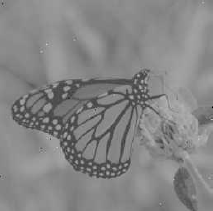



Clipped Image



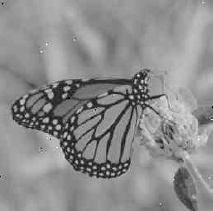

In [120]:
#use clip_hist function to improve quality of the image and show it
min_value = 50
max_value = 200
clipped_image = clip_hist(image, min_value, max_value)

# Display the original and clipped images
print("Original Image\n")
cv2_imshow(image)
print('\n')
print("Clipped Image\n")
cv2_imshow(clipped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()